#ESTUDIANTES:
#STEVEN MONEDERO SOTO - CC1006491142 Codigo estudiante: 2245284
#BRIAM JIMENEZ FRANCO - CC1020422892 Codigo estudiante: 2243810

In [ ]:
!pip install ultralytics==8.0.196

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from ultralytics import YOLO
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/78.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wKvT8zqA4k5MbJKFfmp3")
project = rf.workspace("deteccionepp").project("deteccion_epp")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteccion_EPP-2 in yolov8:: 100%|██████████| 436/436 [00:00<00:00, 6945.98it/s]


In [ ]:
HOME="/content"
%cd {HOME}

/content


In [ ]:
!yolo task=detect mode=train model=yolov8n.yaml  data=/content/Deteccion_EPP-2/data.yaml epochs=300 imgsz=640

/bin/bash: line 1: yolo: command not found


In [ ]:
from IPython.display import display, Image

/content


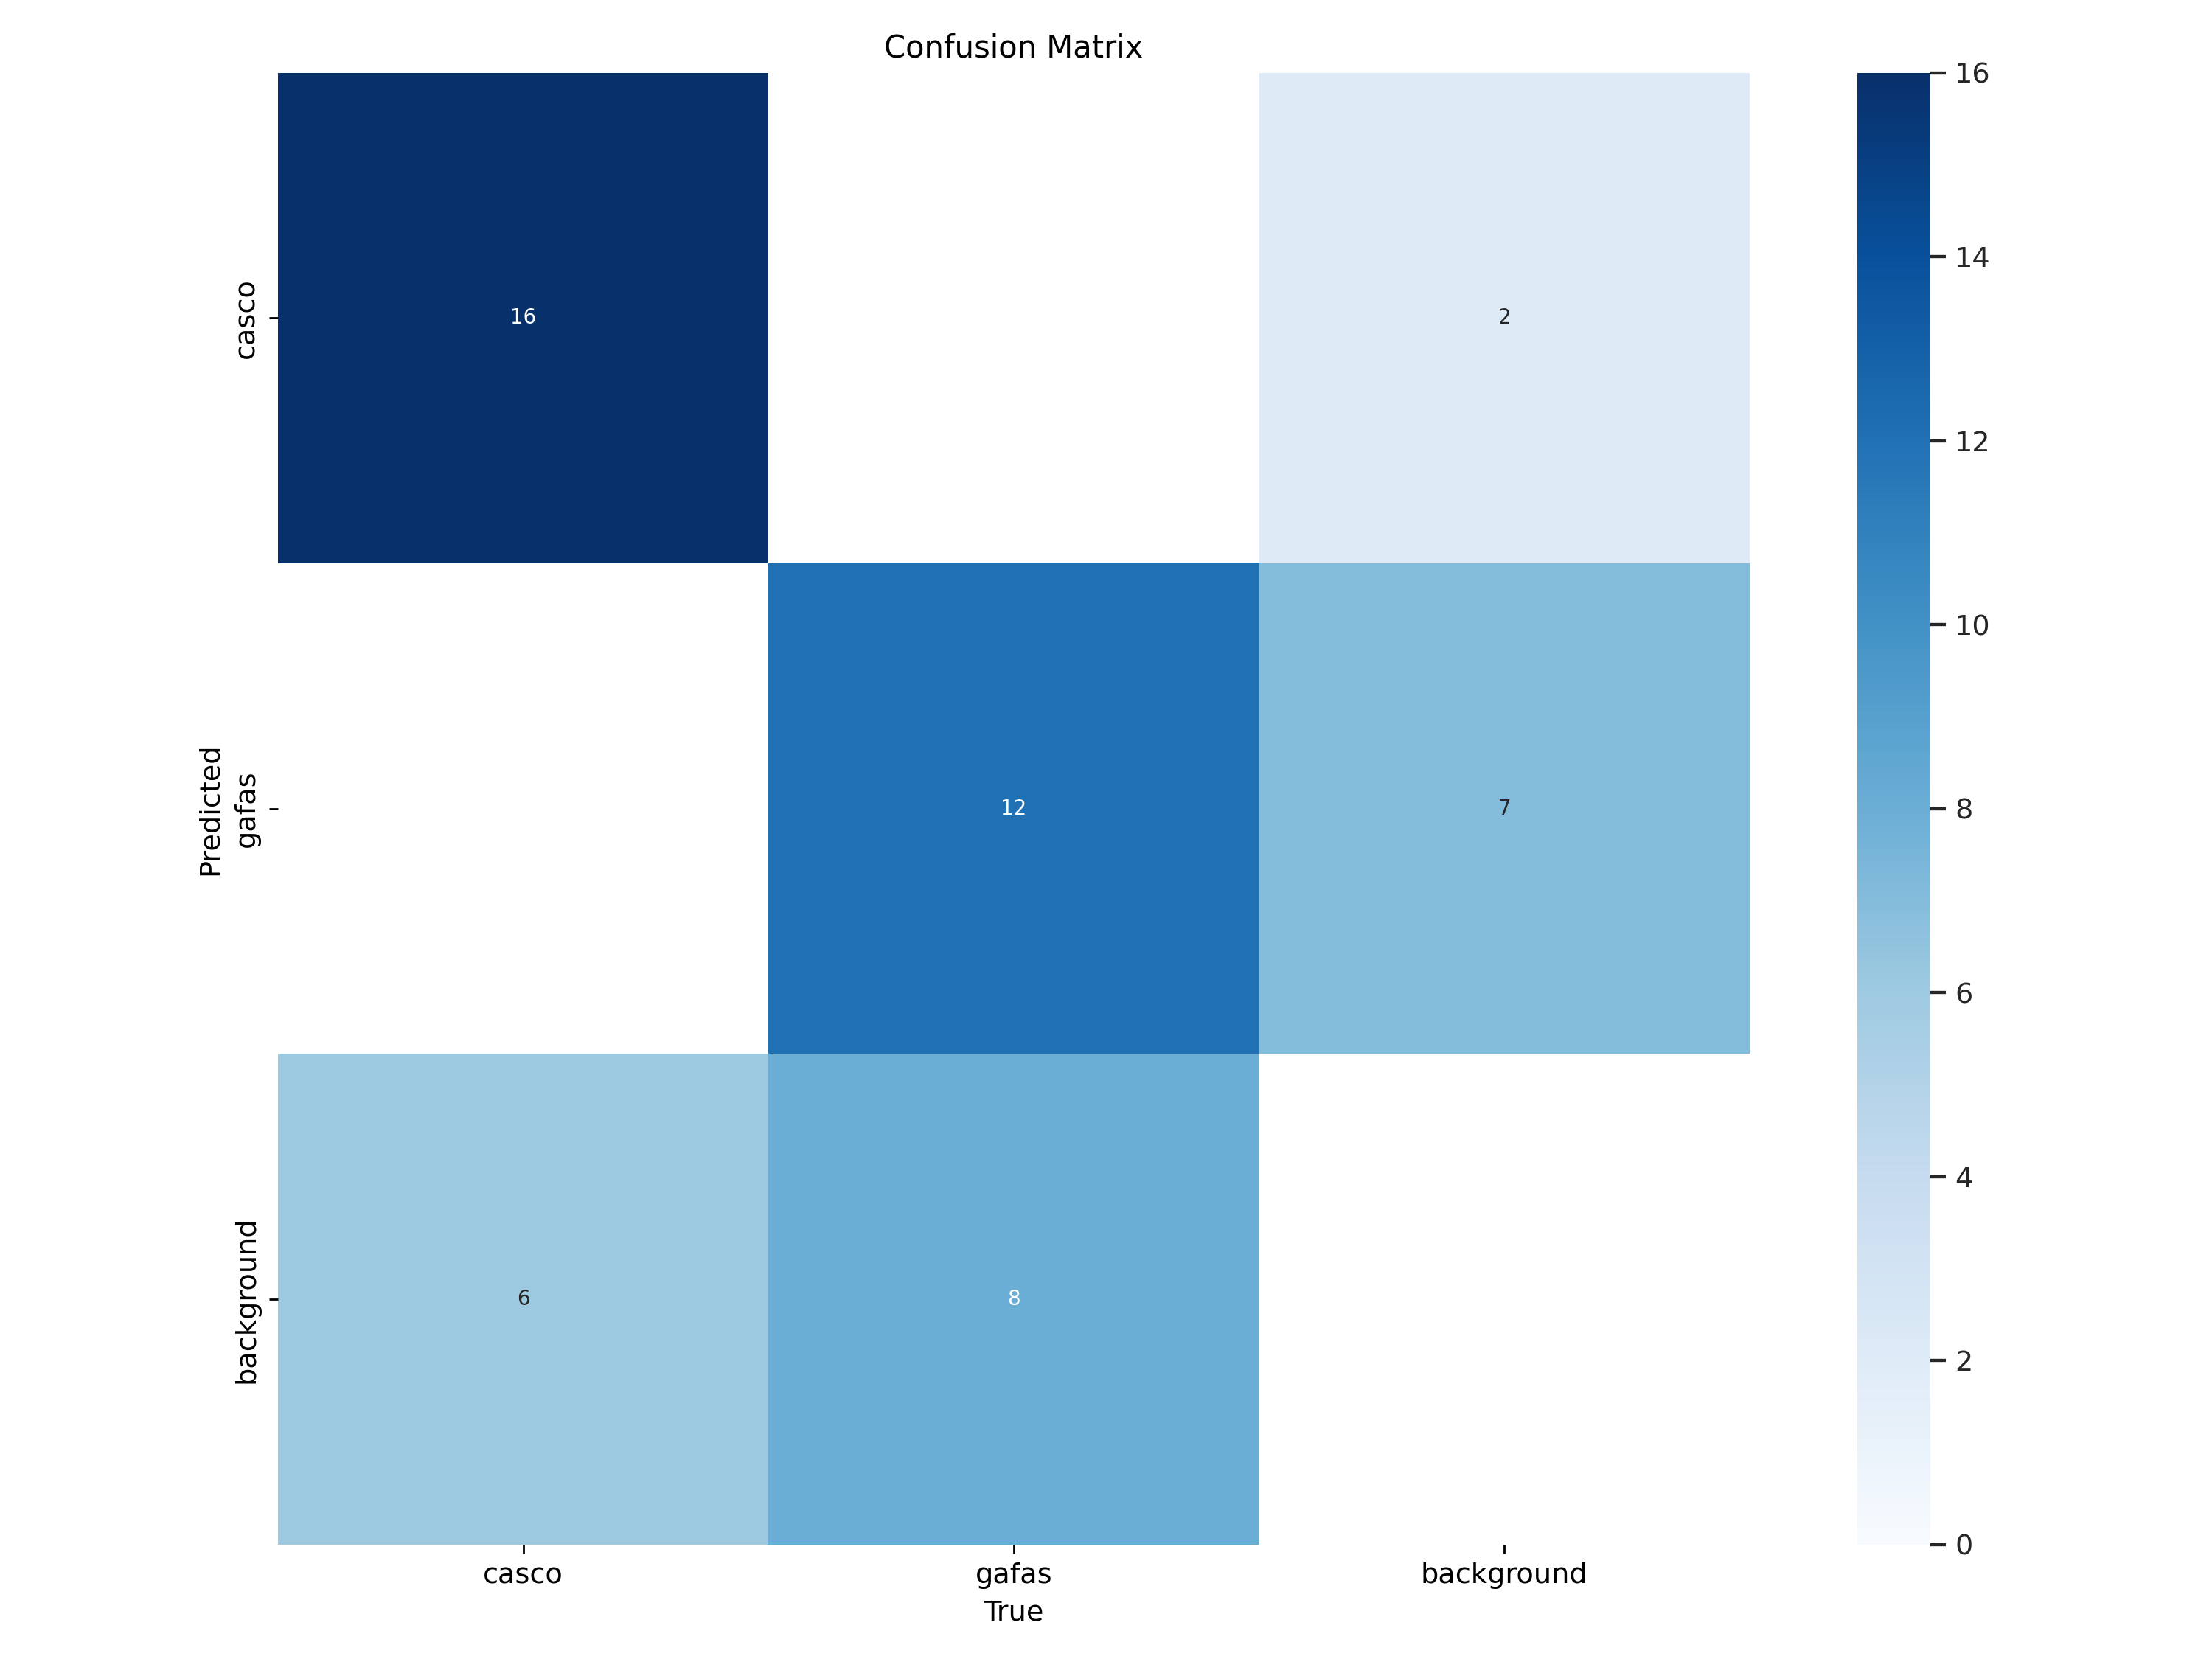

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


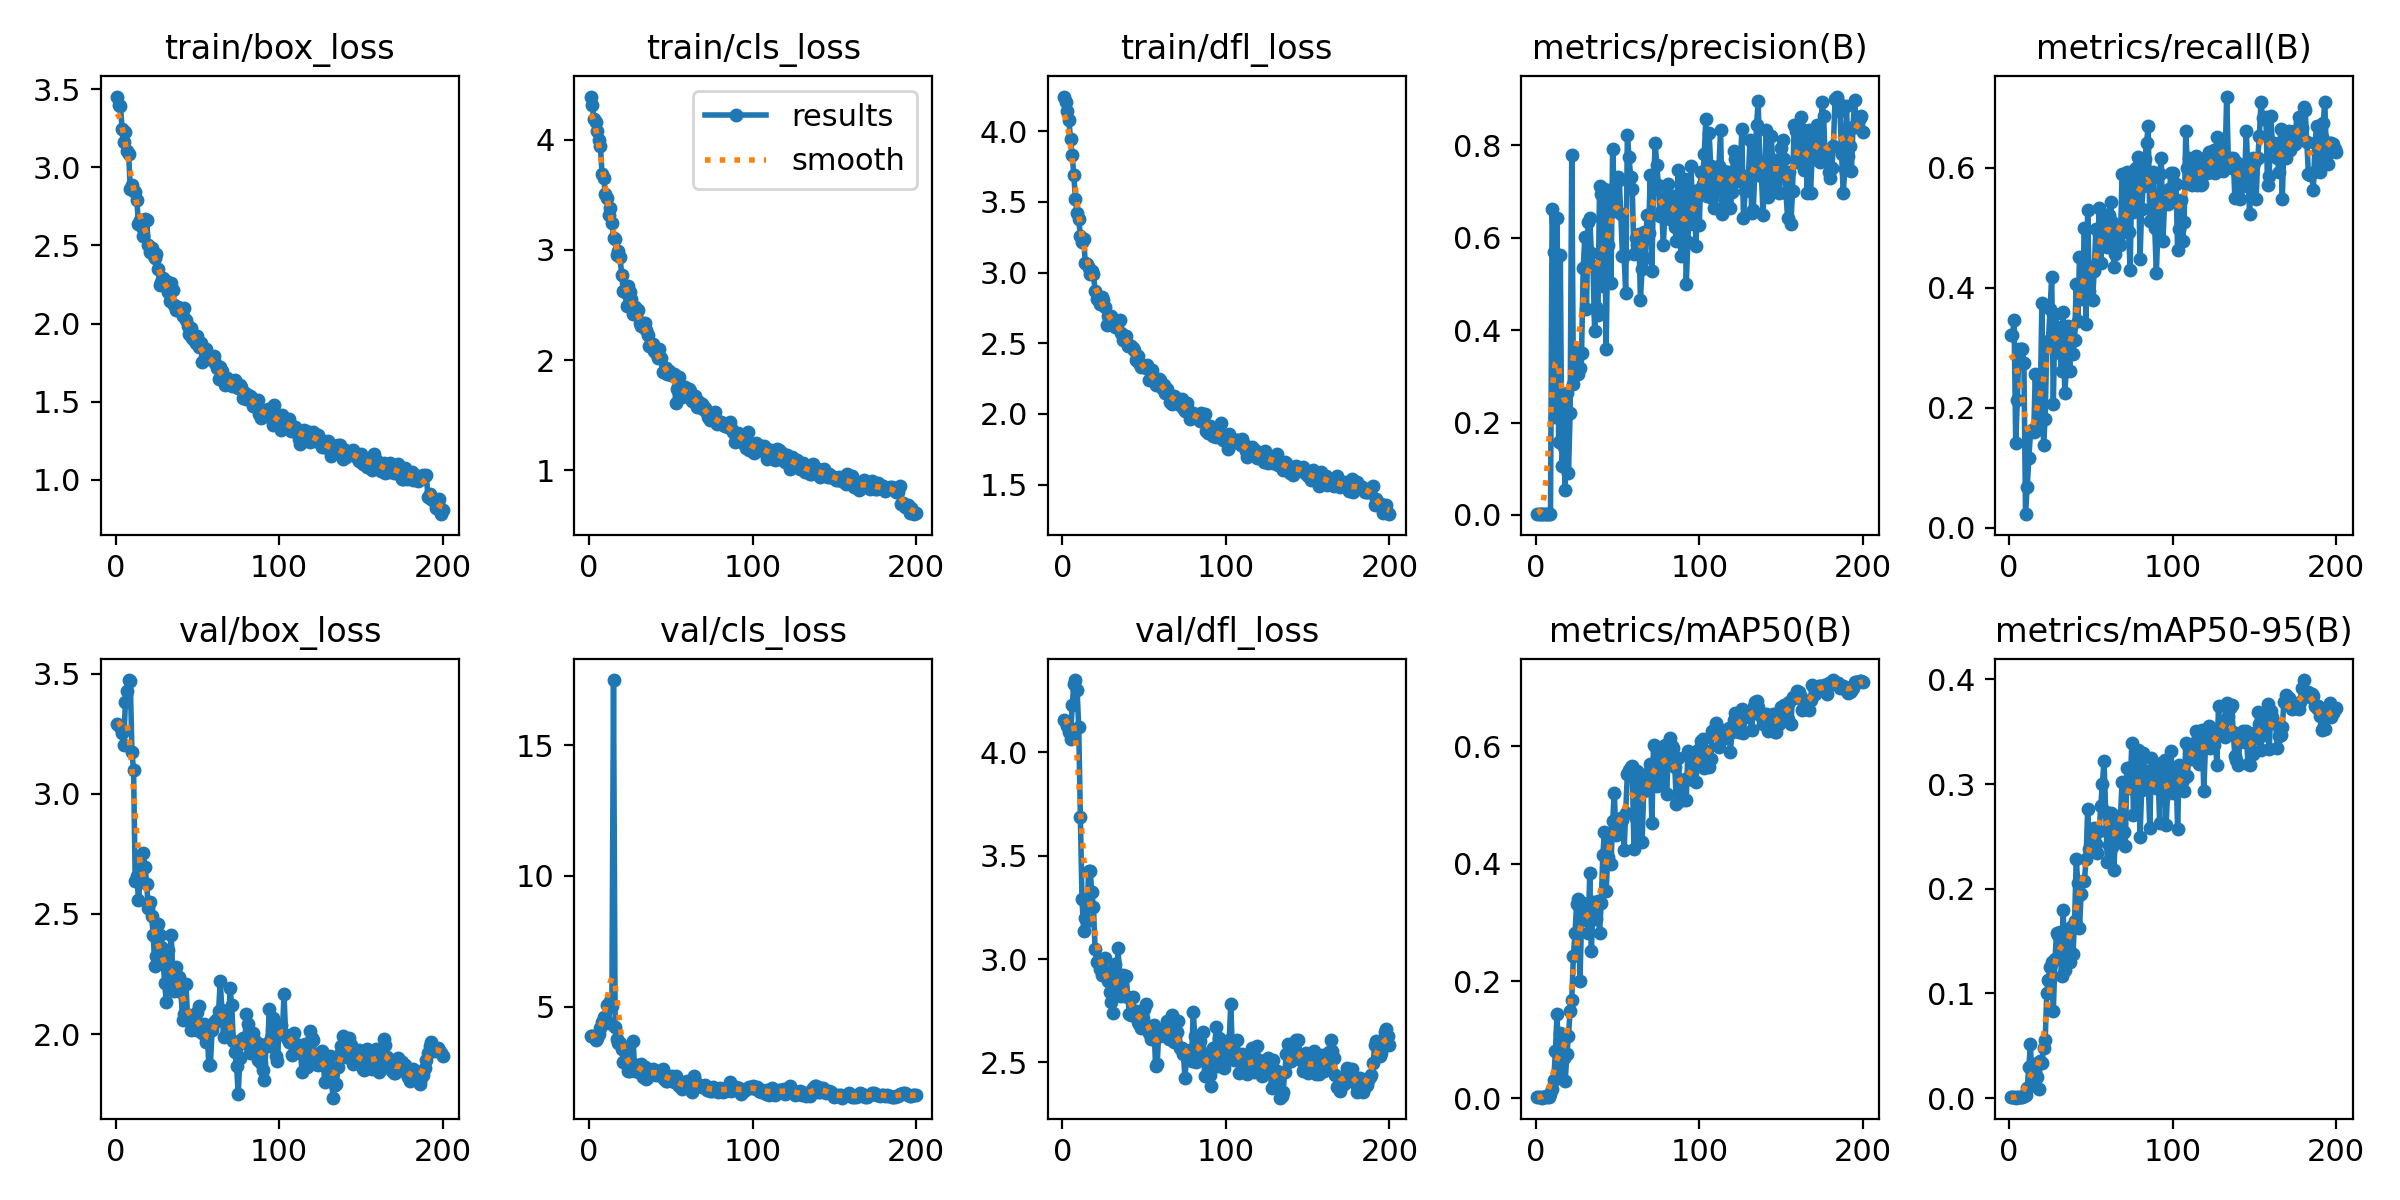

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Deteccion_EPP-2/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Deteccion_EPP-2/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.17it/s]
                   all         18         42      0.729        0.7      0.706      0.399
                 casco         18         22      0.854      0.801      0.798      0.449
                 gafas         18         20      0.604        0.6      0.614      0.349
Speed: 15.3ms preprocess, 27.0ms inference, 0.0ms loss, 40.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train/weights/best.pt \
data=/content/data.yaml \
conf = 0.8 \
source=/content/Prueba.jpg

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Prueba.jpg: 416x640 1 gafas, 63.1ms
Speed: 3.2ms preprocess, 63.1ms inference, 528.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


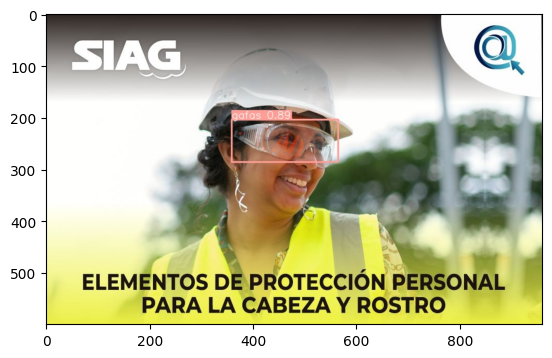

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread('/content/runs/detect/predict4/Prueba.jpg')
plt.imshow(im)